This code will have the aim of comparing the multiplication of two single particle states to the non interacting many body state.

I will start by generating two single body states and multiplying them. The potential used for this can be selected at the top of the program.

As both electrons are going to be spin-up, one of the single body states will be in its ground state whereas the other will be in its first excited state. This is the same configuration as the ground state for the many body system.

In [2]:
#potentials to choose from:
#inversegaussian, 

potential = 'inversegaussian'

#importing modules
import iDEA as idea
import numpy as np
import matplotlib.pyplot as plt

#define x grid
x = np.linspace(-10,10,150)

#define electron interaction, in this case it will approach 0.
#v_int1 = np.full((150,150),1E-5)
v_int1 = 1E-5 * idea.interactions.softened_interaction(x)

#define potential
if potential == 'inversegaussian':
    v_ext = -2*np.exp(-((x)**2)/10)
else:
    raise ValueError('not a valid potential')

#build the atom systems
atom1 = idea.system.System(x,v_ext,v_int1,electrons='u')
atom2 = idea.system.System(x,v_ext,v_int1,electrons='u')

#plot the external potential as a check
"""
plt.plot(atom1.x, atom1.v_ext, "m-")
plt.xlabel("x")
plt.ylabel("v_ext")
plt.show()
"""

#solve the schrodinger equation for atom1 in ground state and atom2 in the first excited state.
atom1_groundstate = idea.methods.interacting.solve(atom1, k=0)
atom2_firststate = idea.methods.interacting.solve(atom2, k=1)
print("done")

iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
done


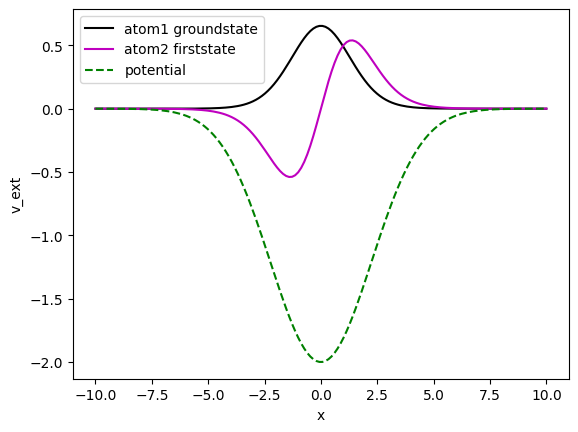

In [3]:
#plot both wavefunctions
plt.plot(atom1.x, atom1_groundstate.space.real, 'k-', label='atom1 groundstate')
plt.plot(atom2.x, atom2_firststate.space.real, 'm-', label='atom2 firststate')
plt.plot(atom1.x, v_ext, 'g--',label='potential')
plt.legend()
plt.xlabel("x")
plt.ylabel("v_ext")
plt.show()

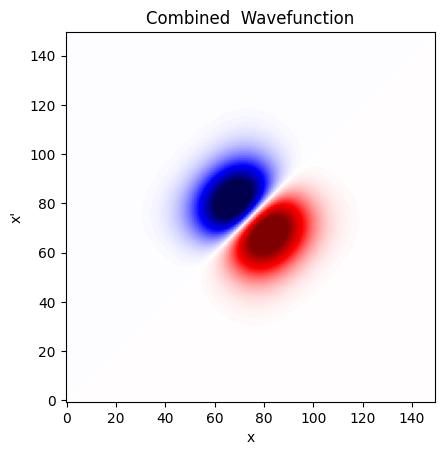

In [19]:
#combine wavefunctions using the outer product

#print(atom1_groundstate.full.shape)
#combined_wavefunction = atom1_groundstate.full*atom2_firststate.full
#print(combined_wavefunctions)

combined_wavefunction = np.outer(atom1_groundstate.space.real,atom2_firststate.space.real)-np.outer(atom2_firststate.space.real,atom1_groundstate.space.real)
#print(combined_wavefunction.shape)

#plot the combined wavefunction
plt.imshow(combined_wavefunction, cmap="seismic", vmax = np.max(system1_groundstate.space.real), vmin = -np.max(system1_groundstate.space.real))
plt.title("Combined  Wavefunction")
plt.xlabel("x")
plt.ylabel("x'")
plt.gca().invert_yaxis()
#plt.savefig("2024-10-07-combined1E-5")
plt.show()

Now, simulate the same system using a non interacting many body wavefunction.

In [15]:
v_int2 = 1E-5 * idea.interactions.softened_interaction(x)
#v_int2 = np.full((150,150),1E-5)
system1 = idea.system.System(x,v_ext,v_int2,electrons='uu')
system1_groundstate = idea.methods.interacting.solve(system1, k=0)


iDEA.methods.interacting.solve: solving eigenproblem...


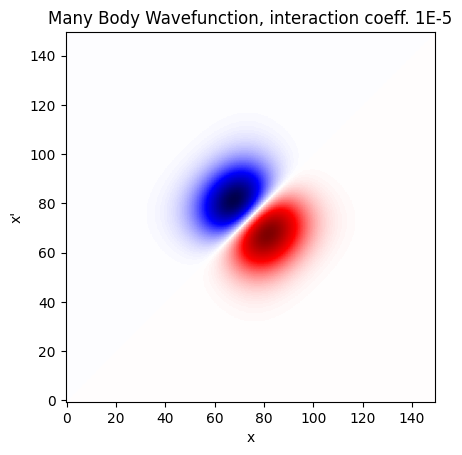

In [21]:
#print(dir(system1_groundstate.space))
#print(system1_groundstate.space.real[75])
#print(system1_groundstate.space.imag[75])

plt.imshow(system1_groundstate.space.real, cmap="seismic", vmax=np.max(system1_groundstate.space.real), vmin=-np.max(system1_groundstate.space.real))
plt.title("Many Body Wavefunction, interaction coeff. 1E-5")
plt.xlabel("x")
plt.ylabel("x'")
plt.gca().invert_yaxis()
#plt.savefig("2024-10-07-manybody1E-5")
plt.show()

Comparing the two graphs by plotting the difference between them

41.421406780718094 %


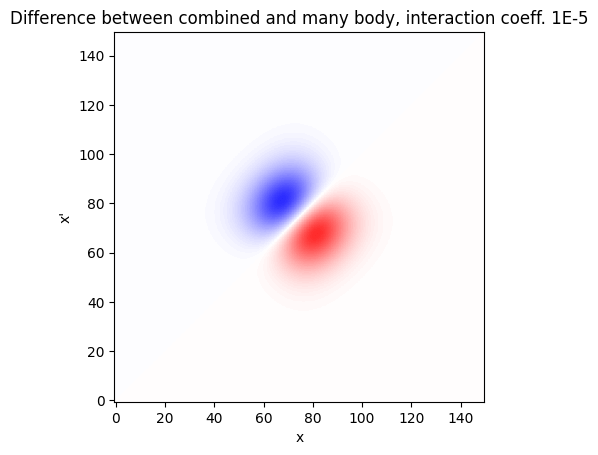

In [23]:
difference = np.subtract(combined_wavefunction,system1_groundstate.space.real)

print(np.max(difference)/np.max(system1_groundstate.space.real)*100,"%")

plt.imshow(difference, cmap="seismic", vmax = np.max(system1_groundstate.space.real), vmin = -np.max(system1_groundstate.space.real))
plt.title("Difference between combined and many body, interaction coeff. 1E-5")
plt.xlabel("x")
plt.ylabel("x'")
plt.gca().invert_yaxis()
#plt.savefig("2024-10-07-difference1E-5")
plt.show()